In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np


In [4]:
data =pd.read_csv('/content/drive/MyDrive/diabetes (1)/diabetes (1).csv')


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data['Outcome'].unique()

array([1, 0])

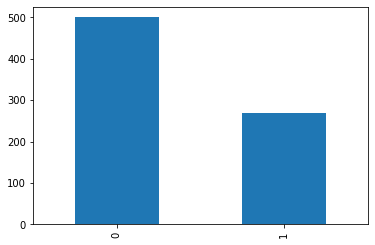

In [8]:
data['Outcome'].value_counts().plot(kind='bar')

In [9]:
o=f=0
for i in data.Outcome:
     if i==0:
        o+=1
     else:
        f+=1

In [10]:
print("Total columns with one outcom",f)
print("Total columns with zero outcom ",o)

Total columns with one outcom 268
Total columns with zero outcom  500


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


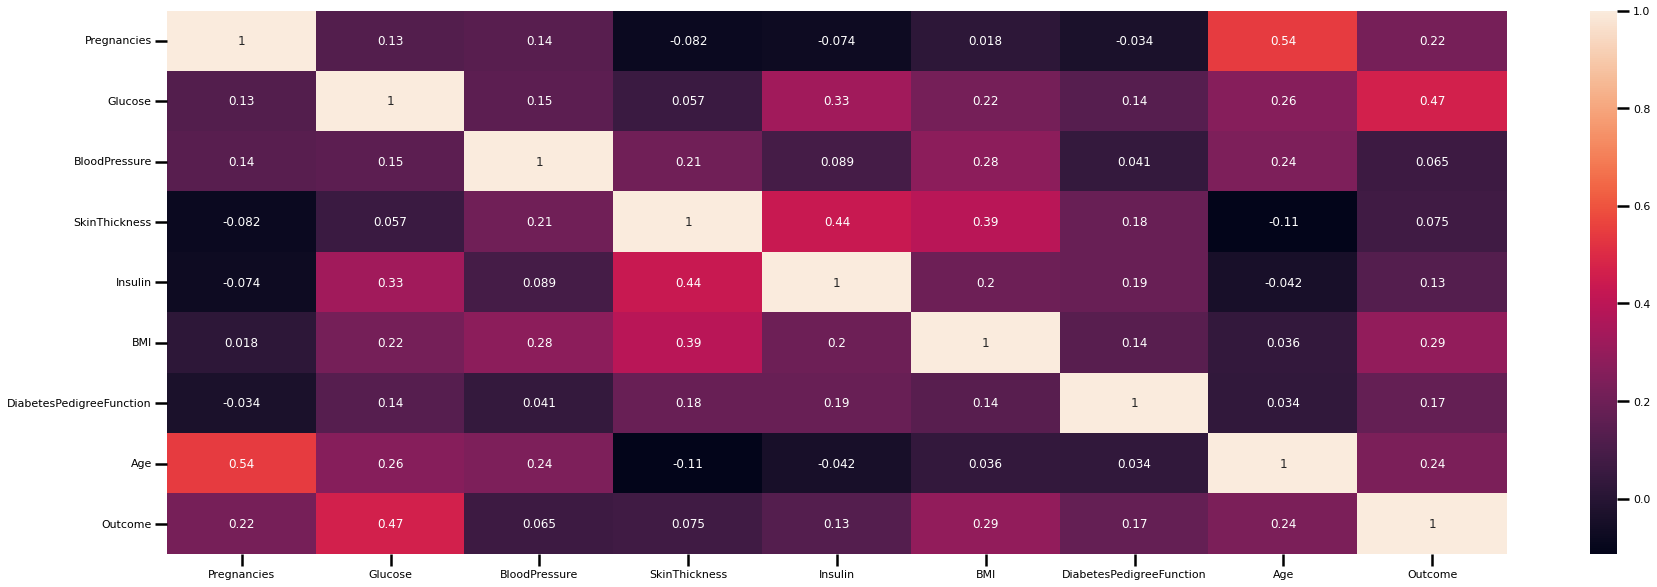

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,10))
sns.set_context('poster', font_scale=0.5)
sns.heatmap(data.corr(), annot=True)

In [13]:
plt.figure(figsize=(15,10))



<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

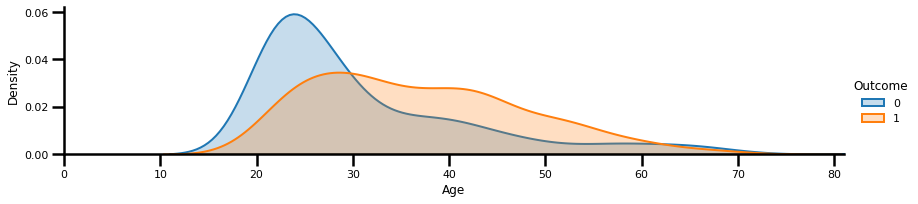

In [14]:
facet = sns.FacetGrid(data, hue="Outcome",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0,data['Age'].max()))
facet.add_legend()
 
plt.show()

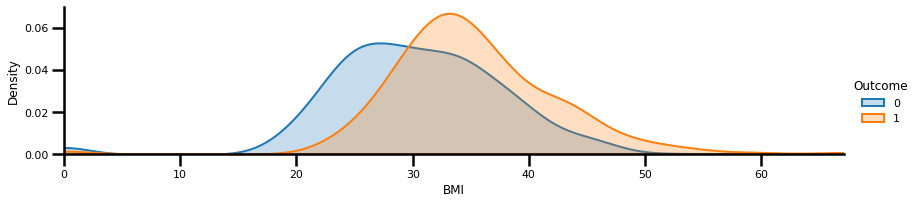

In [15]:
facet = sns.FacetGrid(data, hue="Outcome",aspect=4)
facet.map(sns.kdeplot,'BMI',shade= True)
facet.set(xlim=(0,data['BMI'].max()))
facet.add_legend()
 
plt.show()

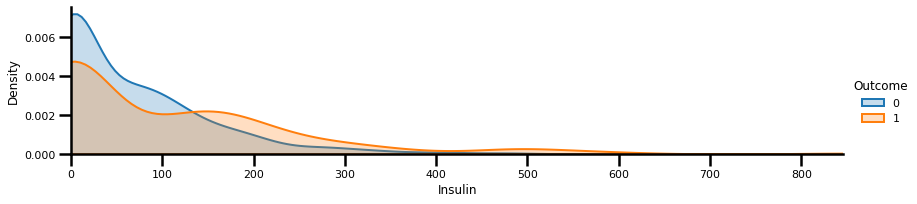

In [16]:
facet = sns.FacetGrid(data, hue="Outcome",aspect=4)
facet.map(sns.kdeplot,'Insulin',shade= True)
facet.set(xlim=(0,data['Insulin'].max()))
facet.add_legend()
 
plt.show()

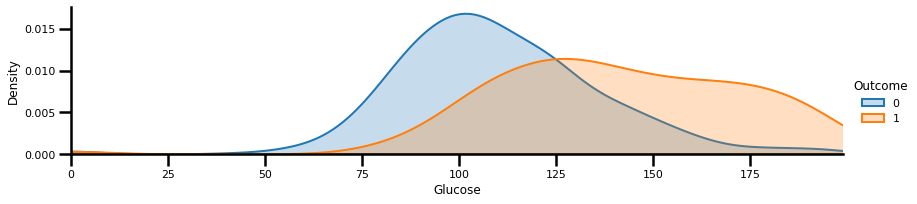

In [17]:
facet = sns.FacetGrid(data, hue="Outcome",aspect=4)
facet.map(sns.kdeplot,'Glucose',shade= True)
facet.set(xlim=(0,data['Glucose'].max()))
facet.add_legend()
 
plt.show()

In [18]:
data['Age_spl']=pd.cut(data['Age'],5)


In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_spl
0,6,148,72,35,0,33.6,0.627,50,1,"(45.0, 57.0]"
1,1,85,66,29,0,26.6,0.351,31,0,"(20.94, 33.0]"
2,8,183,64,0,0,23.3,0.672,32,1,"(20.94, 33.0]"
3,1,89,66,23,94,28.1,0.167,21,0,"(20.94, 33.0]"
4,0,137,40,35,168,43.1,2.288,33,1,"(20.94, 33.0]"


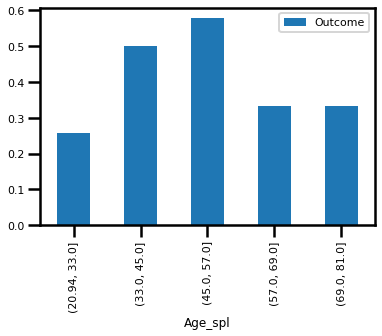

In [20]:
data[['Age_spl','Outcome']].groupby(['Age_spl']).mean().plot(kind='bar')

In [21]:
data[['Age_spl','Outcome']].groupby(['Age_spl']).mean()

,Outcome
Age_spl,
"(20.94, 33.0]",0.257384
"(33.0, 45.0]",0.500000
"(45.0, 57.0]",0.578947
"(57.0, 69.0]",0.333333
"(69.0, 81.0]",0.333333


In [22]:
ndata=list(data.Age)
AGELIST=[]

for i in ndata:
  if i in range(20, 33):
    AGELIST.append(0)
  elif i in range(33, 44): 
     AGELIST.append(1)
  elif i in range(44, 57):
    AGELIST.append(2)
  elif i in range(57, 69): 
     AGELIST.append(3)
  elif i in range(69, 82): 
    AGELIST.append(4)



    

    
  
     

In [23]:
AGELIST=pd.DataFrame(AGELIST)

In [24]:
data['AGE_NEW']=AGELIST

In [25]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_spl,AGE_NEW
0,6,148,72,35,0,33.6,0.627,50,1,"(45.0, 57.0]",2
1,1,85,66,29,0,26.6,0.351,31,0,"(20.94, 33.0]",0
2,8,183,64,0,0,23.3,0.672,32,1,"(20.94, 33.0]",0
3,1,89,66,23,94,28.1,0.167,21,0,"(20.94, 33.0]",0
4,0,137,40,35,168,43.1,2.288,33,1,"(20.94, 33.0]",1


In [26]:
data.drop(['Age_spl','Age'],axis=1,inplace=True)

In [27]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,AGE_NEW
0,6,148,72,35,0,33.6,0.627,1,2
1,1,85,66,29,0,26.6,0.351,0,0
2,8,183,64,0,0,23.3,0.672,1,0
3,1,89,66,23,94,28.1,0.167,0,0
4,0,137,40,35,168,43.1,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,3
764,2,122,70,27,0,36.8,0.340,0,0
765,5,121,72,23,112,26.2,0.245,0,0
766,1,126,60,0,0,30.1,0.349,1,2


In [28]:
data['AGE']=data['AGE_NEW']

In [29]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,AGE_NEW,AGE
0,6,148,72,35,0,33.6,0.627,1,2,2
1,1,85,66,29,0,26.6,0.351,0,0,0
2,8,183,64,0,0,23.3,0.672,1,0,0
3,1,89,66,23,94,28.1,0.167,0,0,0
4,0,137,40,35,168,43.1,2.288,1,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,3,3
764,2,122,70,27,0,36.8,0.340,0,0,0
765,5,121,72,23,112,26.2,0.245,0,0,0
766,1,126,60,0,0,30.1,0.349,1,2,2


In [30]:
data.drop('AGE_NEW',axis=1,inplace=True)


In [31]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,AGE
0,6,148,72,35,0,33.6,0.627,1,2
1,1,85,66,29,0,26.6,0.351,0,0
2,8,183,64,0,0,23.3,0.672,1,0
3,1,89,66,23,94,28.1,0.167,0,0
4,0,137,40,35,168,43.1,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,3
764,2,122,70,27,0,36.8,0.340,0,0
765,5,121,72,23,112,26.2,0.245,0,0
766,1,126,60,0,0,30.1,0.349,1,2


In [32]:
data['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [33]:
ndata=list(data.Glucose)
GlucoseLIST=[]

for i in ndata:
  if i in range(0,100):
    GlucoseLIST.append(0)
  elif i in range(100, 117): 
     GlucoseLIST.append(1)
  elif i in range(117, 140):
    GlucoseLIST.append(2)
  elif i in range(140, 200): 
     GlucoseLIST.append(3)

  
  


In [34]:
len(GlucoseLIST)

768

In [35]:
data['new_Glucose']=GlucoseLIST

In [36]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,AGE,new_Glucose
0,6,148,72,35,0,33.6,0.627,1,2,3
1,1,85,66,29,0,26.6,0.351,0,0,0
2,8,183,64,0,0,23.3,0.672,1,0,3
3,1,89,66,23,94,28.1,0.167,0,0,0
4,0,137,40,35,168,43.1,2.288,1,1,2


In [37]:
data.drop('Glucose',axis=1,inplace=True)


In [38]:
data['Glucose']=data['new_Glucose']

In [39]:
data

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,AGE,new_Glucose,Glucose
0,6,72,35,0,33.6,0.627,1,2,3,3
1,1,66,29,0,26.6,0.351,0,0,0,0
2,8,64,0,0,23.3,0.672,1,0,3,3
3,1,66,23,94,28.1,0.167,0,0,0,0
4,0,40,35,168,43.1,2.288,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...
763,10,76,48,180,32.9,0.171,0,3,1,1
764,2,70,27,0,36.8,0.340,0,0,2,2
765,5,72,23,112,26.2,0.245,0,0,2,2
766,1,60,0,0,30.1,0.349,1,2,2,2


In [40]:
data.drop('new_Glucose',axis=1,inplace=True)


In [41]:
data

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose
0,6,72,35,0,33.6,0.627,1,2,3
1,1,66,29,0,26.6,0.351,0,0,0
2,8,64,0,0,23.3,0.672,1,0,3
3,1,66,23,94,28.1,0.167,0,0,0
4,0,40,35,168,43.1,2.288,1,1,2
...,...,...,...,...,...,...,...,...,...
763,10,76,48,180,32.9,0.171,0,3,1
764,2,70,27,0,36.8,0.340,0,0,2
765,5,72,23,112,26.2,0.245,0,0,2
766,1,60,0,0,30.1,0.349,1,2,2


In [42]:
data['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [43]:
data['Insulin_spl']=pd.cut(data['Insulin'],3)

In [44]:
data

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,Insulin_spl
0,6,72,35,0,33.6,0.627,1,2,3,"(-0.846, 282.0]"
1,1,66,29,0,26.6,0.351,0,0,0,"(-0.846, 282.0]"
2,8,64,0,0,23.3,0.672,1,0,3,"(-0.846, 282.0]"
3,1,66,23,94,28.1,0.167,0,0,0,"(-0.846, 282.0]"
4,0,40,35,168,43.1,2.288,1,1,2,"(-0.846, 282.0]"
...,...,...,...,...,...,...,...,...,...,...
763,10,76,48,180,32.9,0.171,0,3,1,"(-0.846, 282.0]"
764,2,70,27,0,36.8,0.340,0,0,2,"(-0.846, 282.0]"
765,5,72,23,112,26.2,0.245,0,0,2,"(-0.846, 282.0]"
766,1,60,0,0,30.1,0.349,1,2,2,"(-0.846, 282.0]"


In [45]:
data['Insulin_spl'].unique()

[(-0.846, 282.0], (282.0, 564.0], (564.0, 846.0]]
Categories (3, interval[float64, right]): [(-0.846, 282.0] < (282.0, 564.0] < (564.0, 846.0]]

In [46]:
ndata=list(data.Insulin)
Insulinlist=[]

for i in ndata:
  if i in range(0,282):
    Insulinlist.append(0)
  elif i in range(282, 564): 
     Insulinlist.append(1)
  elif i in range(564, 847):
    Insulinlist.append(2)
  

In [47]:
len(Insulinlist)

768

In [48]:
data['new_Insulin']=Insulinlist


In [49]:
data.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,Insulin_spl,new_Insulin
0,6,72,35,0,33.6,0.627,1,2,3,"(-0.846, 282.0]",0
1,1,66,29,0,26.6,0.351,0,0,0,"(-0.846, 282.0]",0
2,8,64,0,0,23.3,0.672,1,0,3,"(-0.846, 282.0]",0
3,1,66,23,94,28.1,0.167,0,0,0,"(-0.846, 282.0]",0
4,0,40,35,168,43.1,2.288,1,1,2,"(-0.846, 282.0]",0


In [50]:
data.drop(['Insulin_spl','Insulin'],axis=1,inplace=True)

In [51]:
data.head()

,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,new_Insulin
0,6,72,35,33.6,0.627,1,2,3,0
1,1,66,29,26.6,0.351,0,0,0,0
2,8,64,0,23.3,0.672,1,0,3,0
3,1,66,23,28.1,0.167,0,0,0,0
4,0,40,35,43.1,2.288,1,1,2,0


In [52]:
data['Insulin']=data['new_Insulin']

In [53]:
data

,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,new_Insulin,Insulin
0,6,72,35,33.6,0.627,1,2,3,0,0
1,1,66,29,26.6,0.351,0,0,0,0,0
2,8,64,0,23.3,0.672,1,0,3,0,0
3,1,66,23,28.1,0.167,0,0,0,0,0
4,0,40,35,43.1,2.288,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
763,10,76,48,32.9,0.171,0,3,1,0,0
764,2,70,27,36.8,0.340,0,0,2,0,0
765,5,72,23,26.2,0.245,0,0,2,0,0
766,1,60,0,30.1,0.349,1,2,2,0,0


In [54]:
data.drop('new_Insulin',axis=1,inplace=True)

In [55]:
data

,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,Insulin
0,6,72,35,33.6,0.627,1,2,3,0
1,1,66,29,26.6,0.351,0,0,0,0
2,8,64,0,23.3,0.672,1,0,3,0
3,1,66,23,28.1,0.167,0,0,0,0
4,0,40,35,43.1,2.288,1,1,2,0
...,...,...,...,...,...,...,...,...,...
763,10,76,48,32.9,0.171,0,3,1,0
764,2,70,27,36.8,0.340,0,0,2,0
765,5,72,23,26.2,0.245,0,0,2,0
766,1,60,0,30.1,0.349,1,2,2,0


In [56]:
data['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [57]:
ndata=list(data.SkinThickness)
SkinThicknesslist=[]

for i in ndata:
  if i in range(0,23):
    SkinThicknesslist.append(0)
  elif i in range(23, 32): 
     SkinThicknesslist.append(1)
  elif i in range(32, 100):
    SkinThicknesslist.append(2)


In [58]:
len(SkinThicknesslist)

768

In [59]:
data['new_SkinThickness']=SkinThicknesslist


In [60]:
data

,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,Insulin,new_SkinThickness
0,6,72,35,33.6,0.627,1,2,3,0,2
1,1,66,29,26.6,0.351,0,0,0,0,1
2,8,64,0,23.3,0.672,1,0,3,0,0
3,1,66,23,28.1,0.167,0,0,0,0,1
4,0,40,35,43.1,2.288,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...
763,10,76,48,32.9,0.171,0,3,1,0,2
764,2,70,27,36.8,0.340,0,0,2,0,1
765,5,72,23,26.2,0.245,0,0,2,0,1
766,1,60,0,30.1,0.349,1,2,2,0,0


In [61]:
data.drop('SkinThickness',axis=1,inplace=True)

In [62]:
data

,Pregnancies,BloodPressure,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,Insulin,new_SkinThickness
0,6,72,33.6,0.627,1,2,3,0,2
1,1,66,26.6,0.351,0,0,0,0,1
2,8,64,23.3,0.672,1,0,3,0,0
3,1,66,28.1,0.167,0,0,0,0,1
4,0,40,43.1,2.288,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...
763,10,76,32.9,0.171,0,3,1,0,2
764,2,70,36.8,0.340,0,0,2,0,1
765,5,72,26.2,0.245,0,0,2,0,1
766,1,60,30.1,0.349,1,2,2,0,0


In [63]:
data['SkinThickness']=data['new_SkinThickness']


In [64]:
data.drop('new_SkinThickness',axis=1,inplace=True)


In [65]:
data

,Pregnancies,BloodPressure,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,Insulin,SkinThickness
0,6,72,33.6,0.627,1,2,3,0,2
1,1,66,26.6,0.351,0,0,0,0,1
2,8,64,23.3,0.672,1,0,3,0,0
3,1,66,28.1,0.167,0,0,0,0,1
4,0,40,43.1,2.288,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...
763,10,76,32.9,0.171,0,3,1,0,2
764,2,70,36.8,0.340,0,0,2,0,1
765,5,72,26.2,0.245,0,0,2,0,1
766,1,60,30.1,0.349,1,2,2,0,0


In [66]:
data.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [67]:
ndata=list(data.BloodPressure)
BloodPressurelist=[]

for i in ndata:
  if i in range(0,62):
    BloodPressurelist.append(0)
  elif i in range(62, 90): 
     BloodPressurelist.append(1)
  elif i in range(90, 123):
    BloodPressurelist.append(2)


In [68]:
data['new_BloodPressure']=BloodPressurelist

In [69]:
data

,Pregnancies,BloodPressure,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,Insulin,SkinThickness,new_BloodPressure
0,6,72,33.6,0.627,1,2,3,0,2,1
1,1,66,26.6,0.351,0,0,0,0,1,1
2,8,64,23.3,0.672,1,0,3,0,0,1
3,1,66,28.1,0.167,0,0,0,0,1,1
4,0,40,43.1,2.288,1,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...
763,10,76,32.9,0.171,0,3,1,0,2,1
764,2,70,36.8,0.340,0,0,2,0,1,1
765,5,72,26.2,0.245,0,0,2,0,1,1
766,1,60,30.1,0.349,1,2,2,0,0,0


In [70]:
data.drop('BloodPressure',axis=1,inplace=True)
data

,Pregnancies,BMI,DiabetesPedigreeFunction,Outcome,AGE,Glucose,Insulin,SkinThickness,new_BloodPressure
0,6,33.6,0.627,1,2,3,0,2,1
1,1,26.6,0.351,0,0,0,0,1,1
2,8,23.3,0.672,1,0,3,0,0,1
3,1,28.1,0.167,0,0,0,0,1,1
4,0,43.1,2.288,1,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...
763,10,32.9,0.171,0,3,1,0,2,1
764,2,36.8,0.340,0,0,2,0,1,1
765,5,26.2,0.245,0,0,2,0,1,1
766,1,30.1,0.349,1,2,2,0,0,0


In [71]:
data['BloodPressure']=data['new_BloodPressure']

In [72]:
data.drop('new_BloodPressure',axis=1,inplace=True)


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
y=data['Outcome']
dr=data.copy()


In [75]:
dr.drop('Outcome',axis=1,inplace=True)


In [76]:
x=dr

In [77]:
x

,Pregnancies,BMI,DiabetesPedigreeFunction,AGE,Glucose,Insulin,SkinThickness,BloodPressure
0,6,33.6,0.627,2,3,0,2,1
1,1,26.6,0.351,0,0,0,1,1
2,8,23.3,0.672,0,3,0,0,1
3,1,28.1,0.167,0,0,0,1,1
4,0,43.1,2.288,1,2,0,2,0
...,...,...,...,...,...,...,...,...
763,10,32.9,0.171,3,1,0,2,1
764,2,36.8,0.340,0,2,0,1,1
765,5,26.2,0.245,0,2,0,1,1
766,1,30.1,0.349,2,2,0,0,0


In [78]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [82]:
clf = KNeighborsClassifier(n_neighbors = 14)
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76623377 0.75324675 0.68831169 0.74025974 0.74025974 0.64935065
 0.71428571 0.67532468 0.65789474 0.77631579]


In [83]:
round(np.max(score)*100, 2)

77.63

In [84]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83116883 0.75324675 0.7012987  0.67532468 0.76623377 0.75324675
 0.68831169 0.68831169 0.68421053 0.78947368]


In [85]:
round(np.mean(score)*100, 2)

73.31

In [86]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77922078 0.75324675 0.7012987  0.71428571 0.68831169 0.72727273
 0.76623377 0.72727273 0.65789474 0.71052632]


In [87]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76623377 0.76623377 0.67532468 0.74025974 0.71428571 0.67532468
 0.68831169 0.66233766 0.68421053 0.76315789]
